In [1]:
!pip install tqdm

import matplotlib.pyplot as plt
import numpy as np

from tqdm import tqdm

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


# Machine Learning Assignment 2
## Make model and train data

In [2]:
class Linear:
    r'''Linear model for linear regression'''
    weight = np.zeros(1)
    bias = np.zeros(1)

    def __call__(self, x):
        return self.weight * x + self.bias
    
num_points = 100
epoch = 20000
learning_rate = 1e-3

theta_0 = np.random.uniform(0, 10, 1)
theta_1 = np.random.uniform(0, 10, 1)

x: np.ndarray = np.random.uniform(0, 10, num_points)
y: np.ndarray = theta_0 + theta_1 * x + np.random.normal(0, 1, num_points)

generate $ m $ point pairs $ \{ (x^{(i)}, y^{(i)}) \}_{i = 1}^m $  
generate x values using uniform distribution and make y by following formula

$ y = \theta_0 + \theta_1 * x  + N(0, \sigma)$

## Plotting the input data

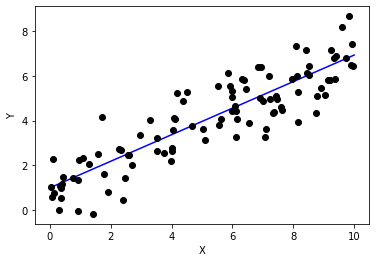

In [3]:
plt.plot([0, 10], theta_0 + theta_1 * [0, 10], color='blue')
plt.plot(x, y, 'ro', color='black')
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

## Train Model

In [4]:
model = Linear()

losses = []
weights = []
biases = []


for step in tqdm(range(epoch)):
    # MSELoss
    loss: np.ndarray = (model(x) - y) ** 2 / (2 * x.shape[0])
        
    # Gradient Descent Algorithm
    temp_bias = model.bias - learning_rate * (model(x) - y).mean()
    temp_weight = model.weight - learning_rate * ((model(x) - y) * x).mean()
    
    # Update parameter
    model.bias = temp_bias
    model.weight = temp_weight

    losses += [loss.mean().item()]
    weights += [model.weight.item()]
    biases += [model.bias.item()]

100%|█████████████████████████████████████████████████████████████████████████| 20000/20000 [00:00<00:00, 22506.73it/s]


Objective function: MSELoss  
$ J(\theta) = \frac{1}{2 m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2 $  

Gradient Descent Algorithm  
$ \theta_0^{(t+1)} := \theta_0^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) $  
$ \theta_1^{(t+1)} := \theta_1^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) x^{(i)} $